<a href="https://colab.research.google.com/github/flyaflya/persuasive/blob/main/demoNotebooks/Metalog_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction - Motivating QPD's

Watch at 0.95 speed (Ben Goodrich Talks Fast) from 0:27 - 1:19, 4:24 - 9:24.  Key takeaway is that the following question remains unanswered:

> What probability distributions are most useful for expressing beliefs about unknowns?


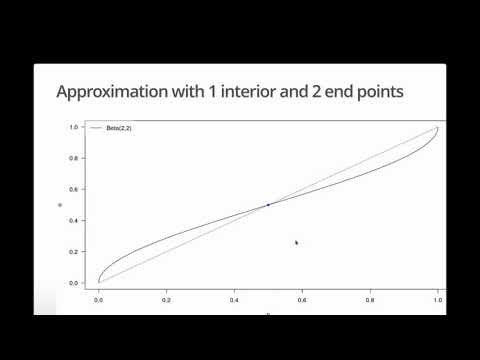

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('_wfZSvasLFk')

## Quantile functions are easy to express beliefs

What is your 90% credible interval for the length of sttelhead trout on the Williamson river?

![](https://www.fisheries.noaa.gov/s3/styles/full_width/s3/dam-migration/steelhead.jpg?itok=IB9FTlag)


## Quantile Functions are the Opposite of CDF's

Let's say your uncertainty in trout length is 6 - 26 inches.  Then, you might choose a normal distribution, like Length ~ Normal(16,5).  But it would take less mental math to just input your quantiles as a triple of 6, 16, 26.

Here I show the pdf and cdf, of a normal

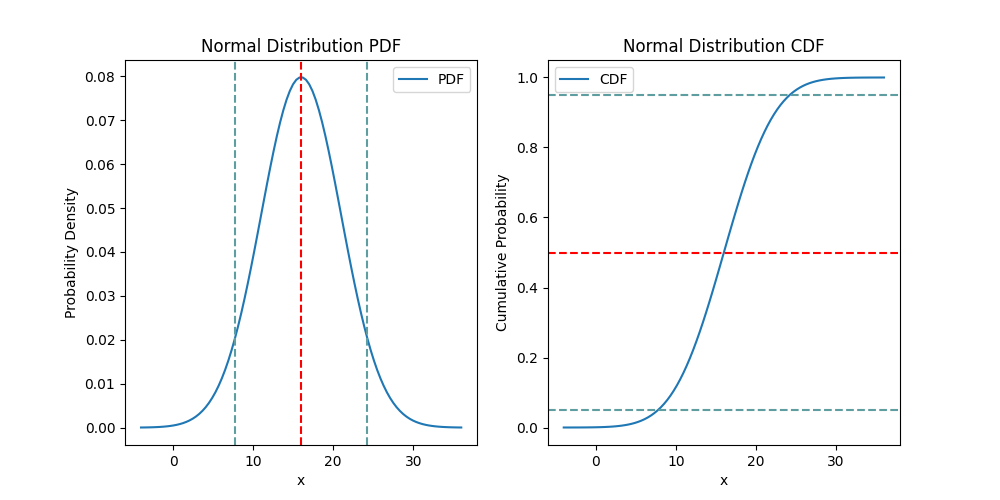

In [25]:
#@title PDF and CDF: show Triplet of 6, 16, 26
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define the parameters of the normal distribution
mu = 16
sigma = 5

# Define the range of x values to plot
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)

# Create the PDF and CDF using the normal distribution
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Calculate the median point
median = norm.median(mu, sigma)

# calculate the quantiles
q05 = norm.ppf(0.05,mu, sigma)
q95 = norm.ppf(0.95,mu, sigma)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the PDF
ax1.plot(x, pdf, label='PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution PDF')
ax1.legend()

# Plot the CDF
ax2.plot(x, cdf, label='CDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Normal Distribution CDF')
ax2.legend()

# Add the median point annotation to both subplots
ax1.axvline(median, color='r', linestyle='--')
ax1.axvline(q05, color='cadetblue', linestyle='--')
ax1.axvline(q95, color='cadetblue', linestyle='--')
ax2.axhline(0.5, color='r', linestyle='--')
ax2.axhline(0.05, color='cadetblue', linestyle='--')
ax2.axhline(0.95, color='cadetblue', linestyle='--')
plt.show()


# The Metalog Distribution 
Express Uncertainty with Quantiles ... not unintuitive parameters of some continuous probability distribution




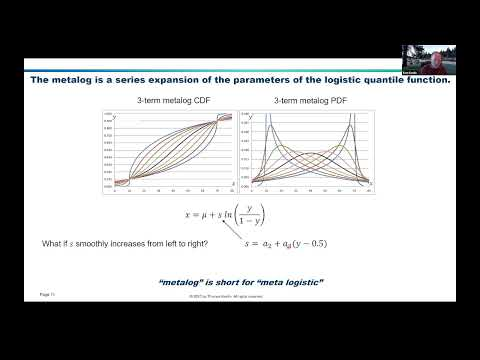

In [26]:
YouTubeVideo('p-AvokUV0Jg')

## The Logistic Quantile Function

$$
\mu + s \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

where $\mu$ is mean, median, and mode and $s$ is proportional to standard deviation such that $\sigma = s \pi / \sqrt{3}$

Setting $\mu = 0$ and $s=1$, we can get the horizontal value (i.e. qunatile) given the vertical value (a.k.a. depth):

$$
\mathcal{M}(y) = \ln \frac{y}{1-y}
$$

where $\mathcal{M}(y)$ us the quantile function associated with depth $0<y<1$



<ipython-input-27-d4f0714a4537>:11: RuntimeWarning: divide by zero encountered in true_divide
  x = np.log(y/(1-y))
<ipython-input-27-d4f0714a4537>:11: RuntimeWarning: divide by zero encountered in log
  x = np.log(y/(1-y))


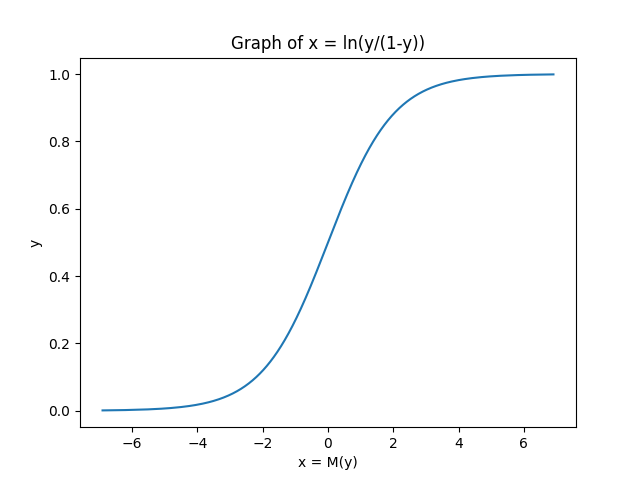

In [27]:
#@title Simple Logistic Quantile Function
## create graph of metalog quantile function
## note, contrary to typical function graphing we generate the  to find x
import matplotlib.pyplot as plt
import numpy as np

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x = np.log(y/(1-y))

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the function on the axis object
ax.plot(x, y)

# Set the labels and title on the axis object
ax.set_xlabel('x = M(y)')
ax.set_ylabel('y')
ax.set_title('Graph of x = ln(y/(1-y))')

# Show the plot
plt.show()



Assuming the above is a CDF, a PDF requires differentiating 

$$
\frac{\textrm{d}x}{\textrm{d}y} [\ln \frac{y}{1-y}] = \frac{1}{y(1-y)}
$$

and then taking the inverse:

$$
\frac{\textrm{d}y}{\textrm{d}x} = y(1-y)
$$

Let's graph this.

<ipython-input-3-7f3998839837>:8: RuntimeWarning: divide by zero encountered in true_divide
  x1 = np.log(y/(1-y))
<ipython-input-3-7f3998839837>:8: RuntimeWarning: divide by zero encountered in log
  x1 = np.log(y/(1-y))


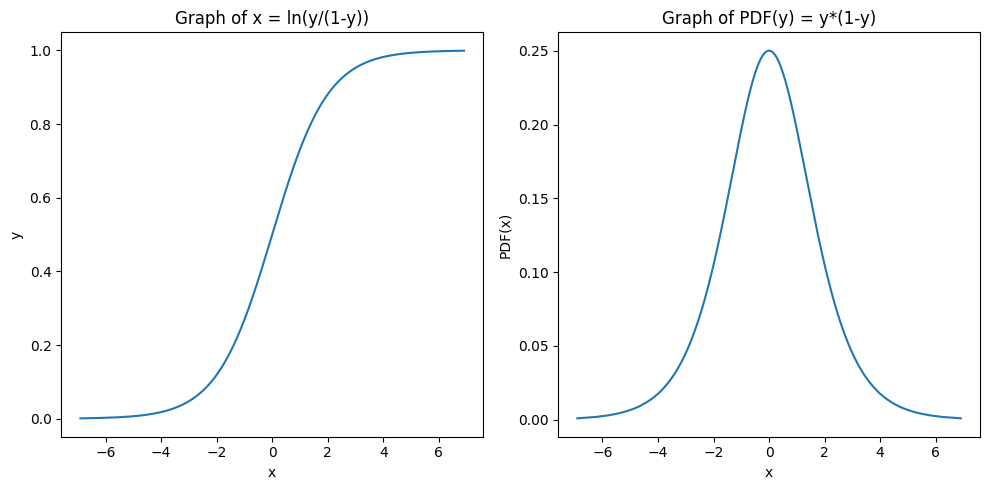

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = np.log(y/(1-y))

# Compute x values for the second subplot using the formula x = y*(1-y)
pdf = y * (1 - y)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x = M(y)')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x = M(y)')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()


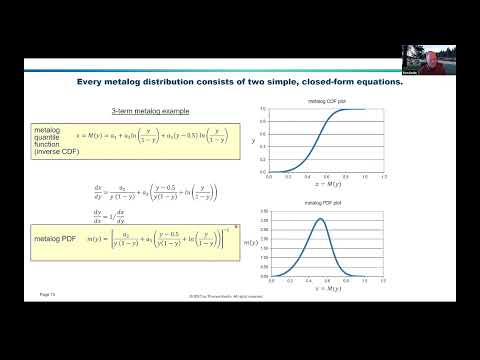

In [35]:
## youtube video
YouTubeVideo('QpZa1Qowwb4')

Now, let's mess with the assumption.  Let's make change from setting  $μ=0$  and  $s=1$ to $\mu = 6$ and plot.  This just shifts the mean:

$$
6 + 1 \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

<ipython-input-28-5f9f669ea533>:8: RuntimeWarning: divide by zero encountered in true_divide
  x1 = 6 + np.log(y/(1-y))   ##CHANGED
<ipython-input-28-5f9f669ea533>:8: RuntimeWarning: divide by zero encountered in log
  x1 = 6 + np.log(y/(1-y))   ##CHANGED


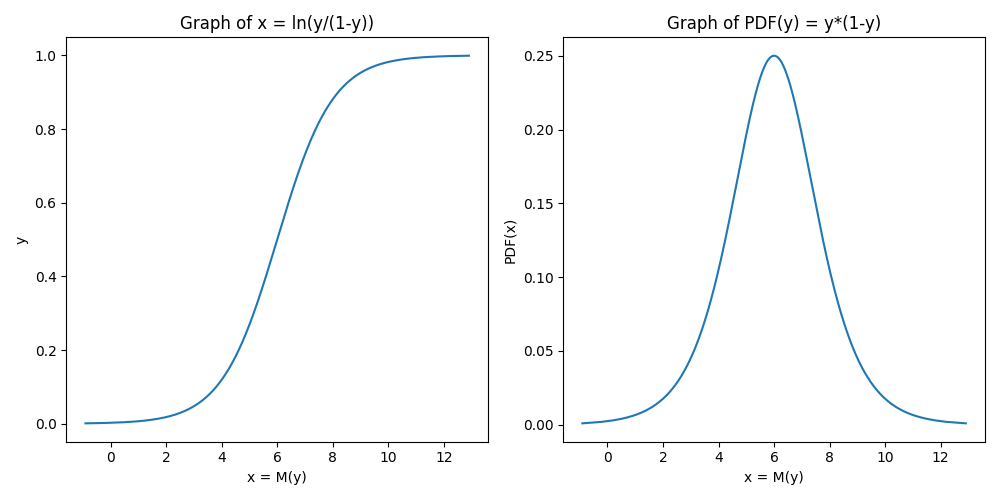

In [28]:
#@title Shift mean over by 6
import matplotlib.pyplot as plt
import numpy as np

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = 6 + np.log(y/(1-y))   ##CHANGED

# Compute x values for the second subplot using the formula x = y*(1-y)
pdf = y * (1 - y)    ### DERIVATIVE DOES NOT CHANGE

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x = M(y)')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x = M(y)')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

Now, let's mess with the assumption some more.  Let's make change from setting  $μ=6$  and  $s=1$ to $\mu = 6$ and  $s=4$.  

$$
6 + 4 \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

where $\mu$ is mean, median, and mode and $s$ is proportional to standard deviation such that $\sigma = s \pi / \sqrt{3}$


<ipython-input-29-06c3bdeefa96>:9: RuntimeWarning: divide by zero encountered in true_divide
  x1 = 6 + 4 * np.log(y/(1-y))   ##CHANGED
<ipython-input-29-06c3bdeefa96>:9: RuntimeWarning: divide by zero encountered in log
  x1 = 6 + 4 * np.log(y/(1-y))   ##CHANGED


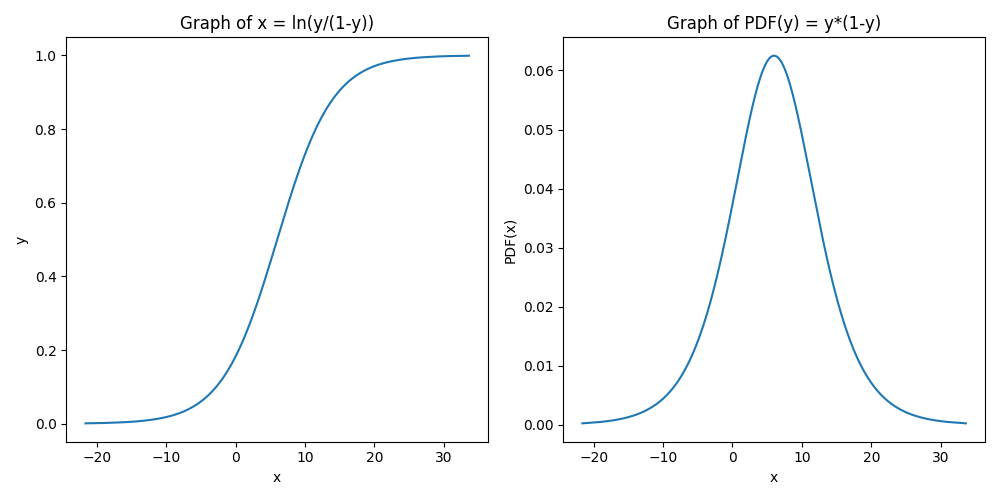

In [29]:
#@title Make s = 4 instead of s=1 -- Notice Increased Spread of Distribution
import matplotlib.pyplot as plt
import numpy as np

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = 6 + 4 * np.log(y/(1-y))   ##CHANGED

# Compute x values for the second subplot using the formula x = y*(1-y)
pdf = y * (1 - y) / 4   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

### The three-term metalog

#### Metalog Quantile Function (Inverse CDF)
$$
M(y) = a_1 + a_2 \ln \frac{y}{1-y} + a_3 (y-0.5) \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$


<ipython-input-30-897240d6188b>:13: RuntimeWarning: divide by zero encountered in true_divide
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-30-897240d6188b>:13: RuntimeWarning: divide by zero encountered in log
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-30-897240d6188b>:13: RuntimeWarning: invalid value encountered in add
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-30-897240d6188b>:16: RuntimeWarning: divide by zero encountered in true_divide
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)
<ipython-input-30-897240d6188b>:16: RuntimeWarning: divide by zero encountered in log
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)


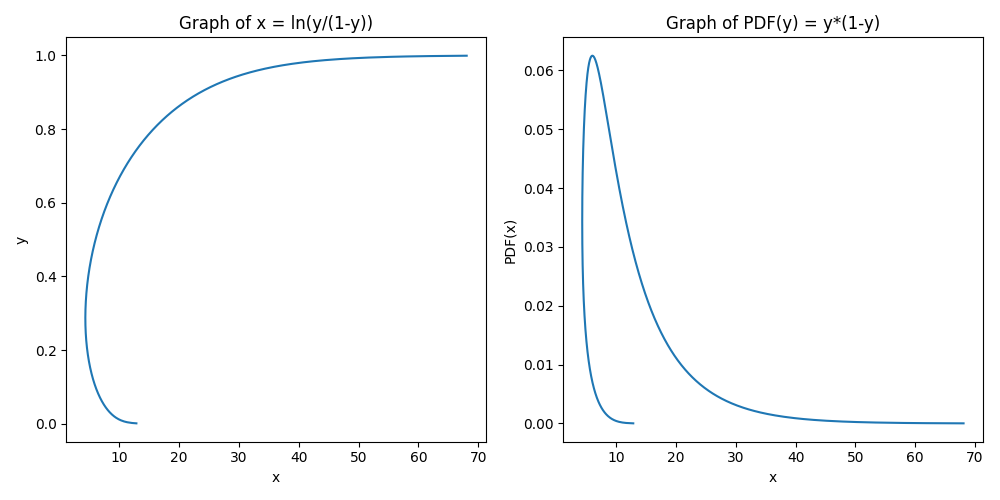

In [30]:
#@title Unsuccessfully Attempt to Introduce Skew with 3-term Metalog (a1 = 6, a2 = 4, a3 = 10)
a1 = 6
a2 = 4
a3 = 10

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED

# Compute y-axis values for second plot as m(y)
pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

<ipython-input-36-4bbb86a146e4>:10: RuntimeWarning: divide by zero encountered in true_divide
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-36-4bbb86a146e4>:10: RuntimeWarning: divide by zero encountered in log
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-36-4bbb86a146e4>:10: RuntimeWarning: invalid value encountered in add
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-36-4bbb86a146e4>:13: RuntimeWarning: divide by zero encountered in true_divide
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)
<ipython-input-36-4bbb86a146e4>:13: RuntimeWarning: divide by zero encountered in log
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)


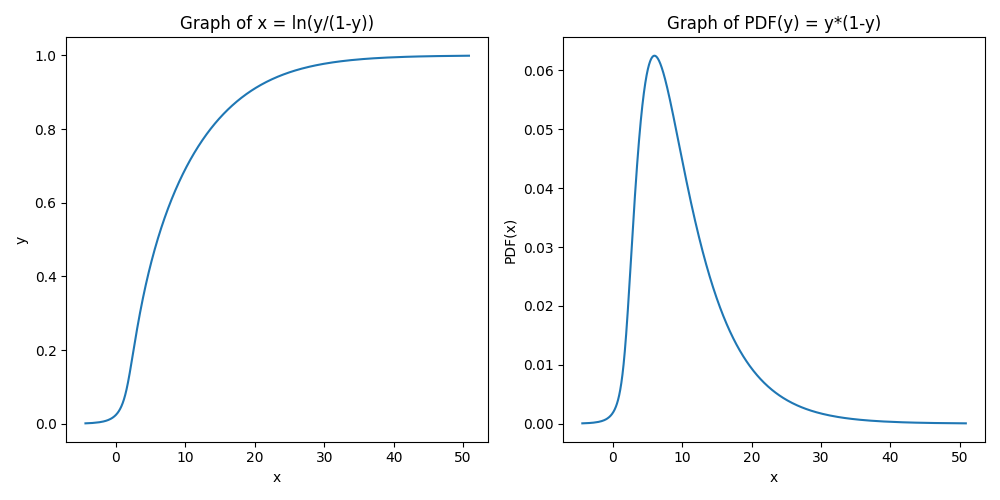

In [36]:
#@title Unsuccessfully Attempt to Introduce Skew with 3-term Metalog (a1 = 6, a2 = 4, a3 = 5)
a1 = 6
a2 = 4
a3 = 5  ## CHANGE THIS TO BE SMALLER

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED

# Compute y-axis values for second plot as m(y)
pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

## Where to get the a coefficients from? (e.g. (a1 = 6, a2 = 4, a3 = 5))

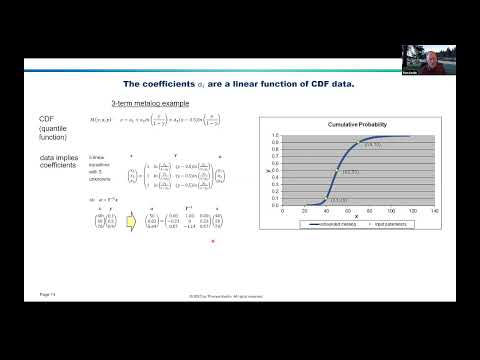

In [34]:
YouTubeVideo('LuS-N6hzak0')

In 

$$
M(y) = x = a_1 + a_2 \ln \frac{y}{1-y} + a_3 (y-0.5) \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

Notice RV $x$ is linear in the a coefficients.  So using our triplet, we can set up a linear system to solve for a where we have three equations and three unknowns:

$$
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
= 
\begin{bmatrix}
    1 & \ln \frac{y_1}{1-y_1} & (y_1 - 0.5) \ln \frac{y_1}{1-y_1} \\
    1 & \ln \frac{y_2}{1-y_2} & (y_2 - 0.5) \ln \frac{y_2}{1-y_2} \\
    1 & \ln \frac{y_3}{1-y_3} & (y_3 - 0.5) \ln \frac{y_3}{1-y_3}
\end{bmatrix}
\begin{bmatrix}
    a_1 \\
    a_2 \\
    a_3
\end{bmatrix}
= Ya
$$

we solve 3 linear equations with three unknowns.  Let's take our 6-16-26 triplet of lengths and solve for $a$ where $x$ and $y$ are:

$$
\begin{aligned}
x &= \begin{bmatrix}
    6 \\
    16 \\
    26
\end{bmatrix}
&
y &= \begin{bmatrix}
    0.05 \\
    0.5 \\
    0.95
\end{bmatrix}
\end{aligned}
$$

such that $Y$ is:

$$
Y = 
\begin{bmatrix}
    1 & \ln \frac{0.05}{1-0.05} & (0.05 - 0.5) \ln \frac{0.05}{1-0.05} \\
    1 & \ln \frac{0.5}{1-0.5} & (0.5 - 0.5) \ln \frac{0.5}{1-0.5} \\
    1 & \ln \frac{0.95}{1-0.95} & (0.95 - 0.5) \ln \frac{0.95}{1-0.95}
\end{bmatrix}
$$

such that $Y^{-1}$ is:

In [39]:
Y = np.array([[1, np.log(0.05/(1-0.05)), (0.05-0.5)*np.log(0.05/(1-0.05))],
              [1, np.log(0.5/(1-0.5)), (0.5-0.5)*np.log(0.5/(1-0.5))],
              [1, np.log(0.95/(1-0.95)), (0.95-0.5)*np.log(0.95/(1-0.95))]])

Y_inv = np.linalg.inv(Y)
np.set_printoptions(precision=3, suppress=True)
Y_inv

array([[ 0.   ,  1.   , -0.   ],
       [-0.17 , -0.   ,  0.17 ],
       [ 0.377, -0.755,  0.377]])

$$
Y^{-1} = 
\begin{bmatrix}
    0 & 1 & -0 \\
    -0.17 & -0 & 0.17 \\
    0.377 & -0.755 & 0.377 \\
\end{bmatrix}
$$

such that $a = Y^{-1}x$ results in:
$$
a = Y^{-1} x =
\begin{bmatrix}
    0 & 1 & -0 \\
    -0.17 & -0 & 0.17 \\
    0.377 & -0.755 & 0.377 \\
\end{bmatrix}
\begin{bmatrix}
    6 \\
    16 \\
    26
\end{bmatrix}
=
$$

In [47]:
x = np.array([6,16,26])
x
a = np.matmul(Y_inv, x)
a

array([16.   ,  3.396,  0.   ])

$$
a = 
\begin{bmatrix}
    16 \\
    3.396 \\
    0
\end{bmatrix}
$$

So our updated Metalog distribution looks like this:

<ipython-input-52-8f463a06ce4a>:10: RuntimeWarning: divide by zero encountered in true_divide
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-52-8f463a06ce4a>:10: RuntimeWarning: divide by zero encountered in log
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-52-8f463a06ce4a>:10: RuntimeWarning: invalid value encountered in multiply
  x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED
<ipython-input-52-8f463a06ce4a>:13: RuntimeWarning: divide by zero encountered in true_divide
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)
<ipython-input-52-8f463a06ce4a>:13: RuntimeWarning: divide by zero encountered in log
  pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)
<ipython-input-52-8f463a06ce4a>:13: RuntimeWarning: i

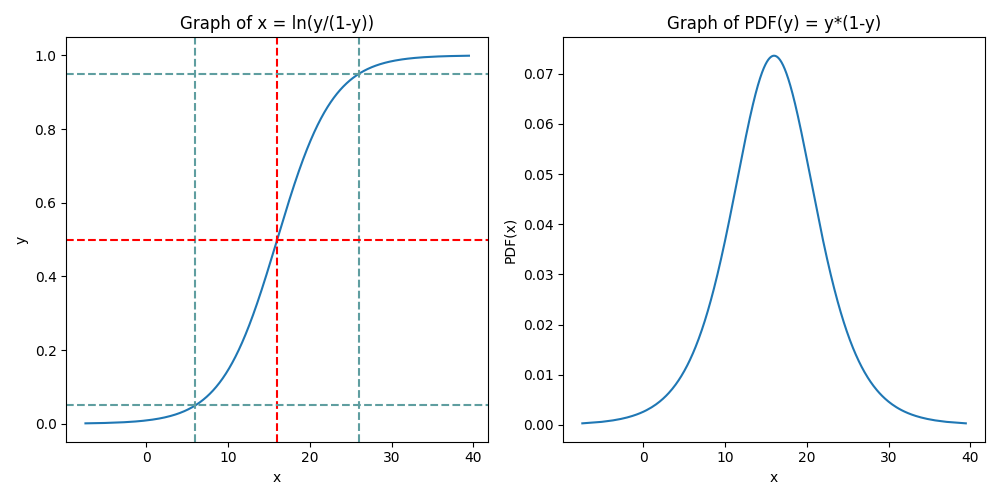

In [52]:
#@title 3-term Metalog (a1 = 16, a2 = 3.396, a3 = 0) of Trout Size Based on Triple 6-16-26
a1 = 16
a2 = 3.396
a3 = 0  ## CHANGE THIS TO BE SMALLER

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED

# Compute y-axis values for second plot as m(y)
pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Add the median point annotation to both subplots
ax1.axvline(16, color='r', linestyle='--')
ax1.axvline(6, color='cadetblue', linestyle='--')
ax1.axvline(26, color='cadetblue', linestyle='--')
ax1.axhline(0.5, color='r', linestyle='--')
ax1.axhline(0.05, color='cadetblue', linestyle='--')
ax1.axhline(0.95, color='cadetblue', linestyle='--')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

## Challenges to Bayesian Updating of Prior Distribution

* The density curve above was not drawn in the typical way.  We sampled $y$ values from 0 to 1 and then converted those y-values into a quantile density function (i.e. Metalog PDF), $m_3(y)$.  Recall that our data is in the form of $x$ values.  So we have no closed-form way of going from $x$ to the pdf of $x$, say $f(x)$.  Recall that our MCMC sampling techniques require a closed form pdf (ffor computation, a closed-form log(PDF) is used.


### Keelin's Way Around This Issue

* Place multi-variate normal prior on coefficients $a$.  Note:  This requires, according to page 19, Appendix B of Keelin and Howard (2021):

> an assumption that places non-zero probabilities of inconsistent quantile parameters... "for updating purposes, one must accept that such non-zero probabilities are immaterial."

## Bayesian Updating of Metalog According to Keelin and Howard

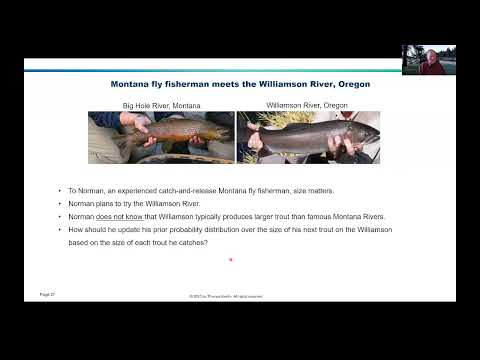

In [54]:
YouTubeVideo('Q7tMx_myIZ8')

## Implementing a Metalog With Empirical Data in a Computational Paradigm
To add the metalog distribution to numpyro, we need two functions.  A sampling method and a logpdf function.  Since the metalog family of distributions contains 60+ distribtuions within it, we will pick one that is easy to work with while we are learning.  We will look at the three-parameter unbounded metalog distribution in this section as we learn.  

## Implementing a Metalog in Computational Bayesian Inference
To add the metalog distribution to numpyro, we need two functions.  A sampling method and a logpdf function.  Since the metalog family of distributions contains 60+ distribtuions within it, we will pick one that is easy to work with while we are learning.  We will look at the three-parameter unbounded metalog distribution in this section as we learn.  

CONTINUED  NEXT WEEK...

The above shows a posterior predictive check using the empirically computed cumulative density function. Simulated model data suggests only ticket counts near 5,000 occur.  However, we see that observed data is much more varied with observations ranging from 1,000 - 8,000.  This tells us our model is no good. that A good HW problem would be to match PDF and CDF's.